**光谱区**

@Date: 2024-01-09  
@Author: Rui Zhu

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from specutils.spectra import SpectralRegion

---
# 光谱区

定义一个连续的光谱区

In [2]:
sr = SpectralRegion(0.45*u.um, 0.5*u.um)
sr

Spectral Region, 1 sub-regions:
  (0.45 um, 0.5 um) 

定义多个片段组成的光谱区

In [3]:
sr_two = SpectralRegion([(0.45*u.um, 0.6*u.um), (0.8*u.um, 0.9*u.um)])
sr_two

Spectral Region, 2 sub-regions:
  (0.45 um, 0.6 um)   (0.8 um, 0.9 um)  

拼接光谱区

In [4]:
sr = SpectralRegion(0.45*u.um, 0.6*u.um) + SpectralRegion(0.8*u.um, 0.9*u.um) + SpectralRegion(0.1*u.um, 0.2*u.um)
sr

Spectral Region, 3 sub-regions:
  (0.1 um, 0.2 um)    (0.45 um, 0.6 um)   (0.8 um, 0.9 um)  

光谱区的索引与切片

In [5]:
sr = SpectralRegion(0.15*u.um, 0.2*u.um) + SpectralRegion(0.3*u.um, 0.4*u.um) +\
     SpectralRegion(0.45*u.um, 0.6*u.um) + SpectralRegion(0.8*u.um, 0.9*u.um) +\
     SpectralRegion(1.0*u.um, 1.2*u.um) + SpectralRegion(1.3*u.um, 1.5*u.um)
sr

Spectral Region, 6 sub-regions:
  (0.15 um, 0.2 um)   (0.3 um, 0.4 um)    (0.45 um, 0.6 um) 
  (0.8 um, 0.9 um)    (1.0 um, 1.2 um)    (1.3 um, 1.5 um)  

In [6]:
sr[1]  # 选择第二个光谱区子片段

Spectral Region, 1 sub-regions:
  (0.3 um, 0.4 um) 

In [7]:
sr[2:5]  # 选择第三到第五个光谱区子片段

Spectral Region, 3 sub-regions:
  (0.45 um, 0.6 um)   (0.8 um, 0.9 um)    (1.0 um, 1.2 um)  

光谱区的边界

In [8]:
sr.bounds

(<Quantity 0.15 um>, <Quantity 1.5 um>)

In [9]:
sr.lower

<Quantity 0.15 um>

In [10]:
sr.upper

<Quantity 1.5 um>

In [11]:
sr[1].upper  # 光谱区自区间的边界

<Quantity 0.4 um>

删除光谱区中的zi

In [12]:
sr

Spectral Region, 6 sub-regions:
  (0.15 um, 0.2 um)   (0.3 um, 0.4 um)    (0.45 um, 0.6 um) 
  (0.8 um, 0.9 um)    (1.0 um, 1.2 um)    (1.3 um, 1.5 um)  

In [13]:
del sr[1]
sr

Spectral Region, 5 sub-regions:
  (0.15 um, 0.2 um)   (0.45 um, 0.6 um)   (0.8 um, 0.9 um)  
  (1.0 um, 1.2 um)    (1.3 um, 1.5 um)  

光谱区可以迭代

In [14]:
sr = (SpectralRegion(0.15*u.um, 0.2*u.um) + SpectralRegion(0.3*u.um, 0.4*u.um) +
      SpectralRegion(0.45*u.um, 0.6*u.um) + SpectralRegion(0.8*u.um, 0.9*u.um) +
      SpectralRegion(1.0*u.um, 1.2*u.um) + SpectralRegion(1.3*u.um, 1.5*u.um))

for s in sr:
    print(s.lower)

0.15 um
0.3 um
0.45 um
0.8 um
1.0 um
1.3 um


获取给定区间内光谱区的补集

In [15]:
sr = (SpectralRegion(0.15*u.um, 0.2*u.um) + SpectralRegion(0.3*u.um, 0.4*u.um) +
      SpectralRegion(0.45*u.um, 0.6*u.um) + SpectralRegion(0.8*u.um, 0.9*u.um) +
      SpectralRegion(1.0*u.um, 1.2*u.um) + SpectralRegion(1.3*u.um, 1.5*u.um))

sr_inverted = sr.invert(0.05*u.um, 3*u.um)
sr_inverted

Spectral Region, 7 sub-regions:
  (0.05 um, 0.15 um)   (0.2 um, 0.3 um)     (0.4 um, 0.45 um)  
  (0.6 um, 0.8 um)     (0.9 um, 1.0 um)     (1.2 um, 1.3 um)   
  (1.5 um, 3.0 um)   

---
# 光谱区提取
* https://specutils.readthedocs.io/en/stable/spectral_regions.html#region-extraction

In [19]:
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.manipulation import extract_region

选取给定波长范围内的光谱

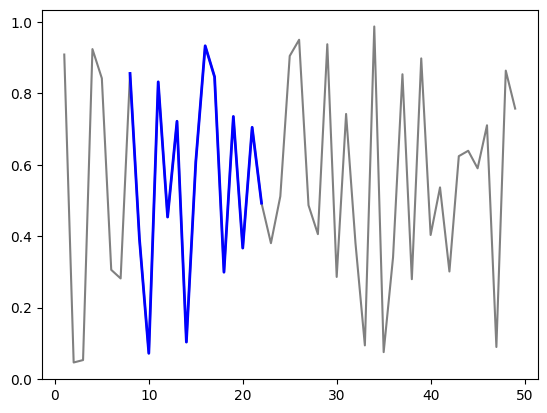

In [27]:
region = SpectralRegion(8*u.nm, 22*u.nm)
spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm, flux=np.random.sample(49)*u.Jy)
sub_spectrum = extract_region(spectrum, region)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, color='blue', lw=2)

选取的单位和光谱的波长单位可以不一致，会自动转换

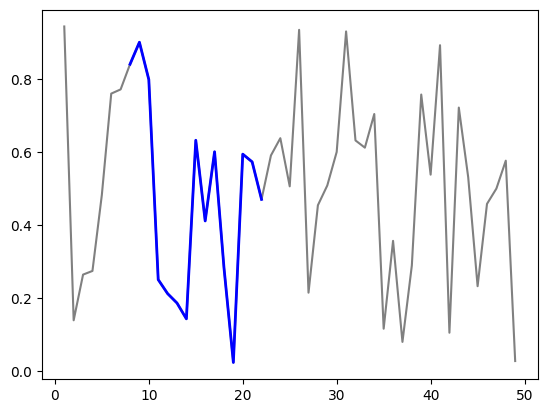

In [29]:
spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm, flux=np.random.sample(49)*u.Jy)
region_angstroms = SpectralRegion(80*u.AA, 220*u.AA)
sub_spectrum = extract_region(spectrum, region_angstroms)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, color='blue', lw=2)

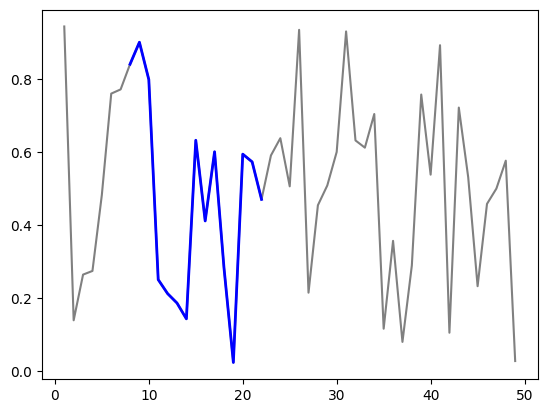

In [31]:
region_pixels = SpectralRegion(7.5*u.pixel, 21.5*u.pixel)
sub_spectrum = extract_region(spectrum, region_pixels)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, color='blue', lw=2)

在一条光谱上提取多个子光谱

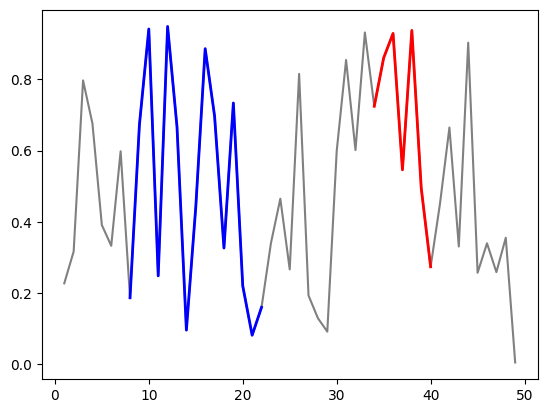

In [54]:
region = SpectralRegion([(8*u.nm, 22*u.nm), (34*u.nm, 40*u.nm)])
spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm, 
                      flux=np.random.default_rng(12345).random(49)*u.Jy)
sub_spectra = extract_region(spectrum, region)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectra[0].spectral_axis, sub_spectra[0].flux, lw=2, color='blue')
ax.plot(sub_spectra[1].spectral_axis, sub_spectra[1].flux, lw=2, color='red')

将提取的多个子光谱粗暴地合成一条光谱

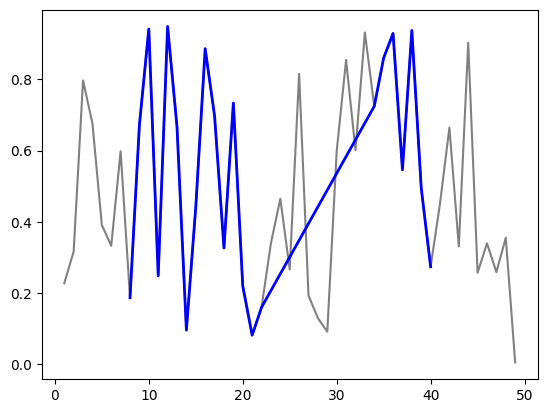

In [52]:
spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm, 
                      flux=np.random.default_rng(12345).random(49)*u.Jy)
region = SpectralRegion([(8*u.nm, 22*u.nm), (34*u.nm, 40*u.nm)])
sub_spectrum = extract_region(spectrum, region, return_single_spectrum=True)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, lw=2, color='blue')

提取多个子光谱区覆盖的最大范围内的子光谱

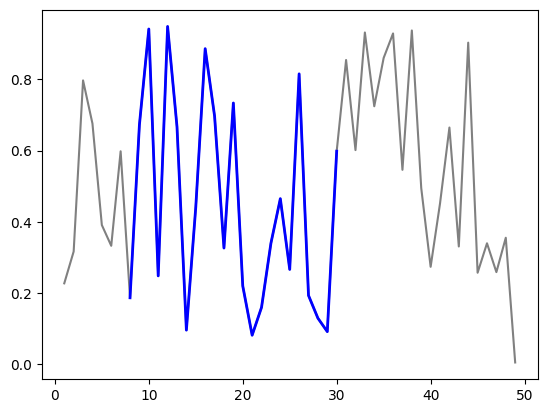

In [55]:
from specutils.manipulation import extract_bounding_spectral_region

spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm,
                      flux=np.random.default_rng(12345).random(49)*u.Jy)
region = SpectralRegion([(8*u.nm, 12*u.nm), (24*u.nm, 30*u.nm)])
sub_spectrum = extract_bounding_spectral_region(spectrum, region)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, lw=2, color='blue')

不用光谱区，直接提取子光谱的方法

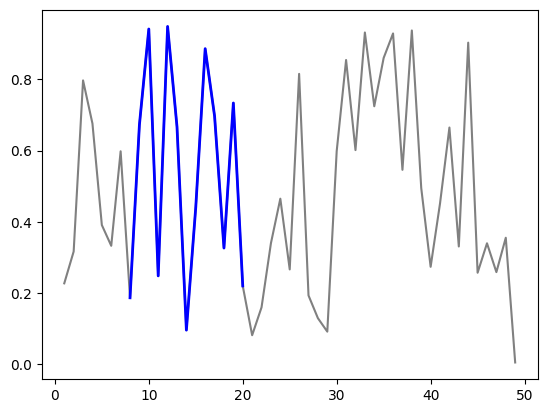

In [56]:
from specutils.manipulation import spectral_slab

spectrum = Spectrum1D(spectral_axis=np.arange(1, 50) * u.nm,
                      flux=np.random.default_rng(12345).random(49)*u.Jy)
sub_spectrum = spectral_slab(spectrum, 8*u.nm, 20*u.nm)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')
ax.plot(sub_spectrum.spectral_axis, sub_spectrum.flux, lw=2, color='blue')

---
# 应用：提取谱线

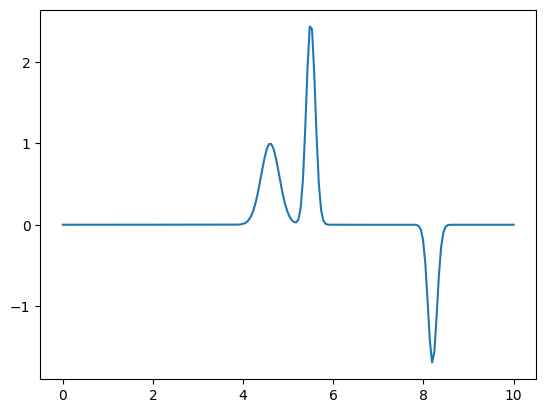

In [58]:
from astropy import units as u
import numpy as np
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling.models import Gaussian1D
from specutils.fitting import find_lines_derivative

# Create a spectrum with three spectral lines
g1 = Gaussian1D(1, 4.6, 0.2)
g2 = Gaussian1D(2.5, 5.5, 0.1)
g3 = Gaussian1D(-1.7, 8.2, 0.1)

x = np.linspace(0, 10, 200)
y = g1(x) + g2(x) + g3(x)
spectrum = Spectrum1D(flux=y * u.Jy, spectral_axis=x * u.um)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux)

提取谱线

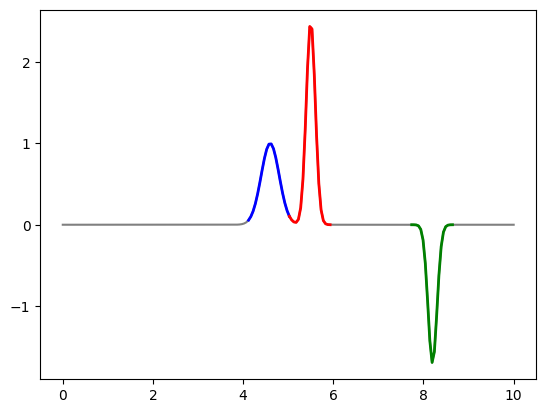

In [66]:
lines = find_lines_derivative(spectrum, flux_threshold=0.01)  # 寻找光谱发射线和吸收线
spec_reg = SpectralRegion.from_line_list(lines)  # 提取谱线区

sub_spectra = extract_region(spectrum, spec_reg)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')

i = 0
for color in ['blue', 'red', 'green']:
    ax.plot(sub_spectra[i].spectral_axis, sub_spectra[i].flux, lw=2, color=color)
    i += 1

提取连续谱

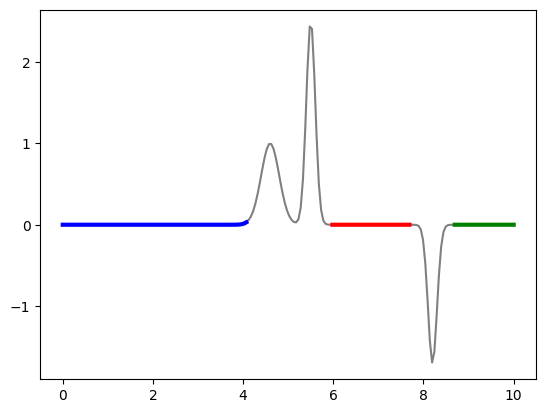

In [71]:
inv_spec_reg = spec_reg.invert(spectrum.spectral_axis[0], spectrum.spectral_axis[-1])
sub_spectra = extract_region(spectrum, inv_spec_reg)

fig, ax = plt.subplots()
ax.plot(spectrum.spectral_axis, spectrum.flux, color='grey')

i = 0
for color in ['blue', 'red', 'green']:
    ax.plot(sub_spectra[i].spectral_axis, sub_spectra[i].flux, lw=3, color=color)
    i += 1